### Build anCNN for ECG Signal Classification (5 classes)  - Keras
This is the implementation of an CNN for classifying the ECG signals. <br>


In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2023-11-22 11:16:43.850394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

### Load the data

In [4]:
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [1]:
print('hi')

hi


In [5]:
pd.read_csv('ECG_dataX.csv').head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pd.read_csv('ECG_dataY.csv').head()

,class_label
0,0
1,0
2,0
3,0
4,0


In [7]:
#convert dataframe to numpy array
X=X.values
X.shape

(3841, 187)

In [8]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [9]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

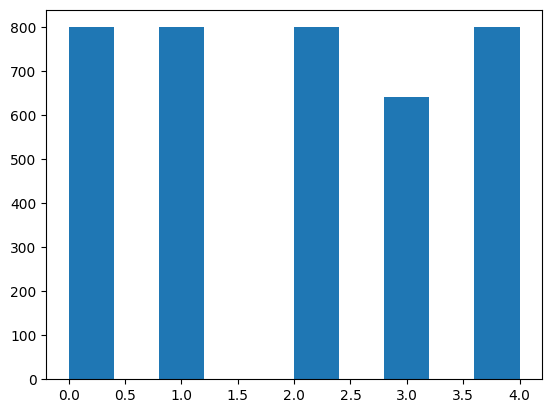

In [10]:
plt.hist(Y)

In [11]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints

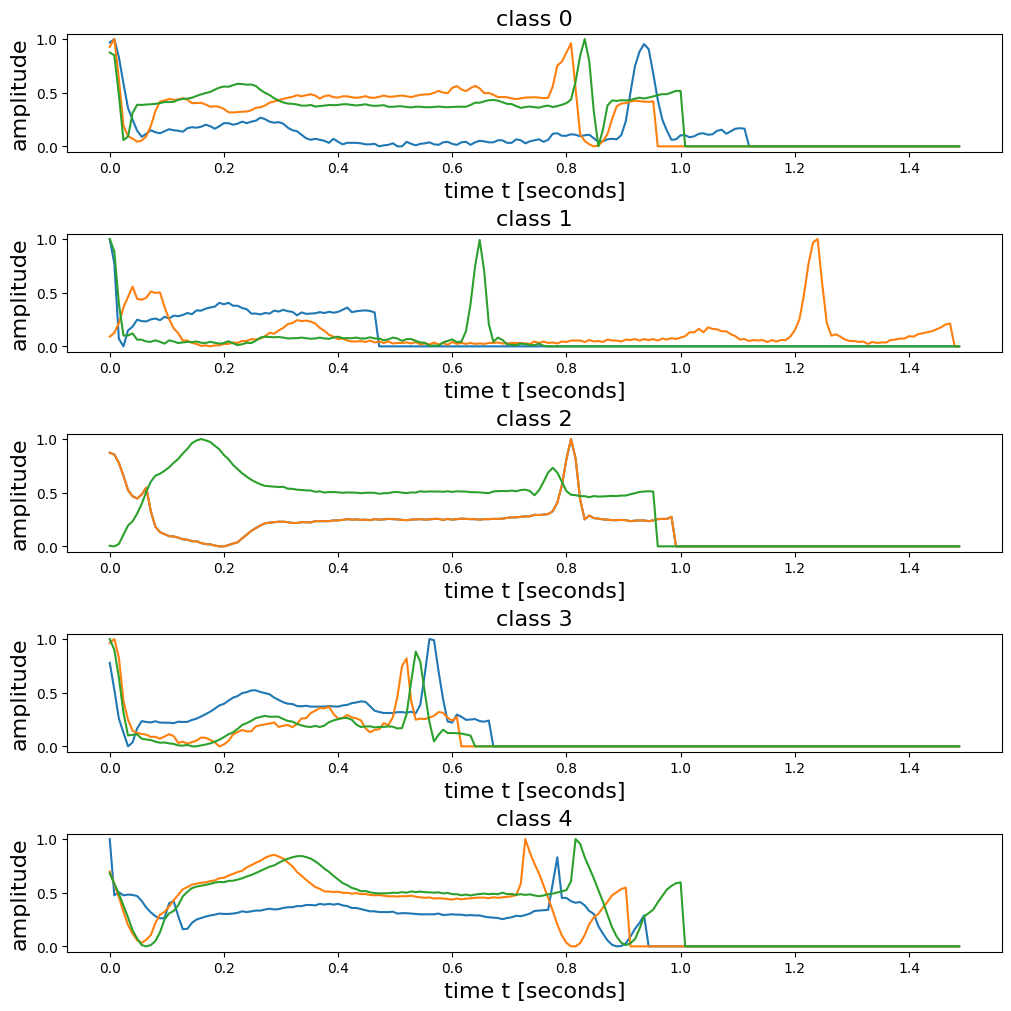

In [12]:
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#note: you may need to add a channel axis to the data if the network is CNN

In [14]:
Y_train.shape, Y_val.shape

((2764,), (308,))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling1D, LayerNormalization,Flatten
from keras.activations import softmax


In [16]:
from keras.layers import Input, Conv1D
from tensorflow.keras.layers import Add
from keras.layers import Reshape
from keras.layers import GlobalAveragePooling1D
from keras.models import Model


In [17]:
inp=Input(shape=(187,1))
#---1st Layer-------
D1=Conv1D(filters=32, kernel_size=5,strides=1,padding='same')(inp)
A1=Activation("relu")(D1)
#---Max_Pooling------
M1=MaxPooling1D(pool_size=2,strides=2)(A1)
#---2nd Layer---------
D2=Conv1D(filters=32, kernel_size=5,strides=1,padding='same')(A1)
A2=Activation("relu")(D2)
#GAP_A2=Flatten()(A2)
GAP_A2 = GlobalAveragePooling1D()(A2)
S21=Add()([GAP_A2,M1])
#---Max_Pooling-----
M2=MaxPooling1D(pool_size=2,strides=2)(S21)
#---3rd Layer-------
LN3=LayerNormalization()(S21)
D3=Conv1D(filters=32, kernel_size=5,strides=1,padding='same')(LN3)
A3=Activation("relu")(D3)
GAP_A3 = GlobalAveragePooling1D()(A3)
S32=Add()([GAP_A3,M2])
#---Max Pooling-----
M3=MaxPooling1D(pool_size=2,strides=2)(S32)
#---4th Layer-------
LN4=LayerNormalization()(S32)
D4=Conv1D(filters=32, kernel_size=5,strides=1,padding='same')(LN4)
A4=Activation("relu")(D4)
GAP_A4 = GlobalAveragePooling1D()(A4)
S43=Add()([GAP_A4,M3])
#---5th Layer-------
LN5=LayerNormalization()(S43)
D5=Conv1D(filters=32, kernel_size=5,strides=1,padding='same')(LN5)
A5=Activation("relu")(D5)
F1=Flatten()(A5)
#---6th Layer-------
D6=Dense(5)(F1)
A6=Activation(softmax)(D6)
#----
model=Model(inputs=inp,outputs=A6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 187, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 187, 32)              192       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 187, 32)              0         ['conv1d[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)           (None, 187, 32)              5152      ['activation[0][0]']          
                                                                                              

In [18]:
GAP_A2.shape, M1.shape, A2.shape

(TensorShape([None, 32]),
 TensorShape([None, 93, 32]),
 TensorShape([None, 187, 32]))

In [19]:
S43.shape

TensorShape([None, 23, 32])

In [20]:
D6.shape,A6.shape

(TensorShape([None, 5]), TensorShape([None, 5]))

### Define the MLP model

In [21]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

In [22]:
Y_train.shape

(2764,)

In [23]:
X_train.shape

(2764, 187)

In [24]:
X_train=np.array(X_train)

In [25]:
X_train=X_train.reshape(-1,187,1)
X_train.shape

(2764, 187, 1)

In [26]:
X_val=np.array(X_val)

In [27]:
X_val.reshape(-1,187,1)

array([[[0.        ],
        [0.01980198],
        [0.08712871],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.70711297],
        [0.38075313],
        [0.18828452],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.79079497],
        [0.8242678 ],
        [0.79288703],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.98563218],
        [0.73563218],
        [0.27873564],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.92838877],
        [0.71099746],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.9173913 ],
        [0.75652176],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [28]:
X_train=X_train.reshape(-1,187,1)
X_train[0].shape, X_val[0].shape

((187, 1), (187,))

In [29]:
X_train=X_train.reshape(2764, 187,1)

In [30]:
for epoch in range(epoch_save+1, 200): #change 100 to a larger number if necessary
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a file 
    model.save('ECG_Keras_sCE_e'+str(epoch)+'.keras')

epoch 0
44/44 [==============================] - 6s 90ms/step - loss: 1.4631 - accuracy: 0.3372 - val_loss: 1.4020 - val_accuracy: 0.4123
epoch 1
44/44 [==============================] - 3s 75ms/step - loss: 1.2683 - accuracy: 0.4721 - val_loss: 1.2724 - val_accuracy: 0.5487
epoch 2
44/44 [==============================] - 3s 70ms/step - loss: 1.1421 - accuracy: 0.5485 - val_loss: 1.1156 - val_accuracy: 0.6039
epoch 3
44/44 [==============================] - 3s 74ms/step - loss: 1.0158 - accuracy: 0.6281 - val_loss: 1.0203 - val_accuracy: 0.6071
epoch 4
44/44 [==============================] - 3s 74ms/step - loss: 0.9061 - accuracy: 0.6596 - val_loss: 0.9504 - val_accuracy: 0.6623
epoch 5
44/44 [==============================] - 3s 67ms/step - loss: 0.9058 - accuracy: 0.6563 - val_loss: 0.9013 - val_accuracy: 0.6623
epoch 6
44/44 [==============================] - 4s 87ms/step - loss: 0.8331 - accuracy: 0.6910 - val_loss: 0.7932 - val_accuracy: 0.6883
epoch 7
44/44 [===================

44/44 [==============================] - 3s 66ms/step - loss: 0.3524 - accuracy: 0.8687 - val_loss: 0.4705 - val_accuracy: 0.8312
epoch 60
44/44 [==============================] - 3s 76ms/step - loss: 0.2988 - accuracy: 0.8824 - val_loss: 0.4510 - val_accuracy: 0.8312
epoch 61
44/44 [==============================] - 3s 63ms/step - loss: 0.3163 - accuracy: 0.8853 - val_loss: 0.4165 - val_accuracy: 0.8377
epoch 62
44/44 [==============================] - 3s 64ms/step - loss: 0.3173 - accuracy: 0.8799 - val_loss: 0.4419 - val_accuracy: 0.8409
epoch 63
44/44 [==============================] - 4s 82ms/step - loss: 0.2929 - accuracy: 0.8889 - val_loss: 0.4607 - val_accuracy: 0.8214
epoch 64
44/44 [==============================] - 3s 63ms/step - loss: 0.3583 - accuracy: 0.8625 - val_loss: 0.4489 - val_accuracy: 0.8377
epoch 65
44/44 [==============================] - 3s 63ms/step - loss: 0.3065 - accuracy: 0.8824 - val_loss: 0.4852 - val_accuracy: 0.8247
epoch 66
44/44 [====================

epoch 118
44/44 [==============================] - 3s 64ms/step - loss: 0.1868 - accuracy: 0.9334 - val_loss: 0.4714 - val_accuracy: 0.8409
epoch 119
44/44 [==============================] - 4s 87ms/step - loss: 0.1920 - accuracy: 0.9309 - val_loss: 0.4677 - val_accuracy: 0.8312
epoch 120
44/44 [==============================] - 3s 71ms/step - loss: 0.2096 - accuracy: 0.9229 - val_loss: 0.4938 - val_accuracy: 0.8247
epoch 121
44/44 [==============================] - 3s 69ms/step - loss: 0.2446 - accuracy: 0.9088 - val_loss: 0.4649 - val_accuracy: 0.8409
epoch 122
44/44 [==============================] - 3s 63ms/step - loss: 0.2009 - accuracy: 0.9309 - val_loss: 0.5182 - val_accuracy: 0.8149
epoch 123
44/44 [==============================] - 3s 61ms/step - loss: 0.1867 - accuracy: 0.9374 - val_loss: 0.4335 - val_accuracy: 0.8571
epoch 124
44/44 [==============================] - 3s 61ms/step - loss: 0.1857 - accuracy: 0.9320 - val_loss: 0.4238 - val_accuracy: 0.8506
epoch 125
44/44 [===

44/44 [==============================] - 3s 61ms/step - loss: 0.1372 - accuracy: 0.9537 - val_loss: 0.5014 - val_accuracy: 0.8506
epoch 177
44/44 [==============================] - 3s 72ms/step - loss: 0.1241 - accuracy: 0.9548 - val_loss: 0.4309 - val_accuracy: 0.8506
epoch 178
44/44 [==============================] - 3s 60ms/step - loss: 0.1385 - accuracy: 0.9475 - val_loss: 0.4407 - val_accuracy: 0.8604
epoch 179
44/44 [==============================] - 3s 59ms/step - loss: 0.1271 - accuracy: 0.9544 - val_loss: 0.4426 - val_accuracy: 0.8636
epoch 180
44/44 [==============================] - 3s 60ms/step - loss: 0.1450 - accuracy: 0.9443 - val_loss: 0.4590 - val_accuracy: 0.8734
epoch 181
44/44 [==============================] - 3s 59ms/step - loss: 0.1387 - accuracy: 0.9479 - val_loss: 0.4754 - val_accuracy: 0.8669
epoch 182
44/44 [==============================] - 3s 59ms/step - loss: 0.1326 - accuracy: 0.9541 - val_loss: 0.4658 - val_accuracy: 0.8571
epoch 183
44/44 [=============

### Train the model

### Plot training loss vs epoch and validation loss vs epoch

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

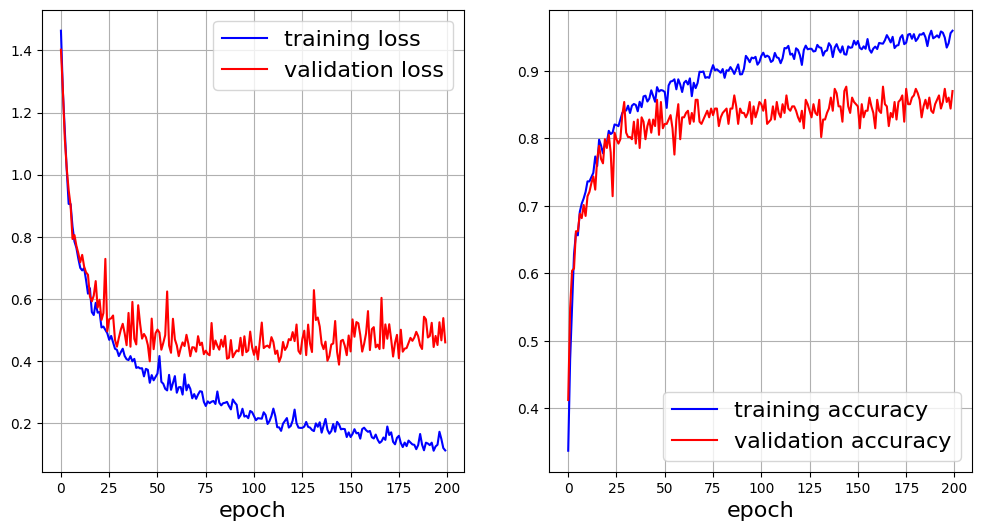

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

### Test the model

In [34]:
#load the best model
best_epoch=np.argmax(acc_val_list)
best_epoch

144

In [35]:
import tensorflow
model = tensorflow.keras.models.load_model("ECG_Keras_sCE_e"+str(best_epoch)+".keras")

In [36]:
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27709969878196716
Test accuracy: 0.9076722860336304


### Make Prediction on the test set

In [37]:
Y_test_pred=model.predict(X_test, batch_size=64)

13/13 [==============================] - 1s 22ms/step


In [38]:
Y_test_pred[0]

array([2.5425581e-04, 9.9974585e-01, 3.3115519e-09, 6.0984671e-09,
       3.7224218e-15], dtype=float32)

In [39]:
np.argmax(Y_test_pred[0])

1

In [40]:
Y_test[0]

1

In [41]:
Y_test_pred=np.argmax(Y_test_pred, axis=1)
print('mah')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       176
           1       0.87      0.88      0.88       154
           2       0.95      0.92      0.93       146
           3       0.90      0.93      0.92       122
           4       0.97      0.97      0.97       171

    accuracy                           0.91       769
   macro avg       0.91      0.91      0.91       769
weighted avg       0.91      0.91      0.91       769

